In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("./Traffic Signs Dataset/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./Traffic Signs Dataset/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./Traffic Signs Dataset/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
x_train,y_train=train['features'],train['labels']
x_valid,y_valid=valid['features'],valid['labels']
x_test,y_test=test['features'],test['labels']

In [4]:
x_train.shape,y_train.shape

((34799, 32, 32, 3), (34799,))

In [5]:
x_valid.shape,y_valid.shape

((4410, 32, 32, 3), (4410,))

In [6]:
x_test.shape,y_test.shape

((12630, 32, 32, 3), (12630,))

1

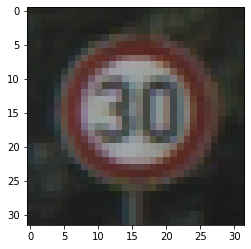

In [7]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

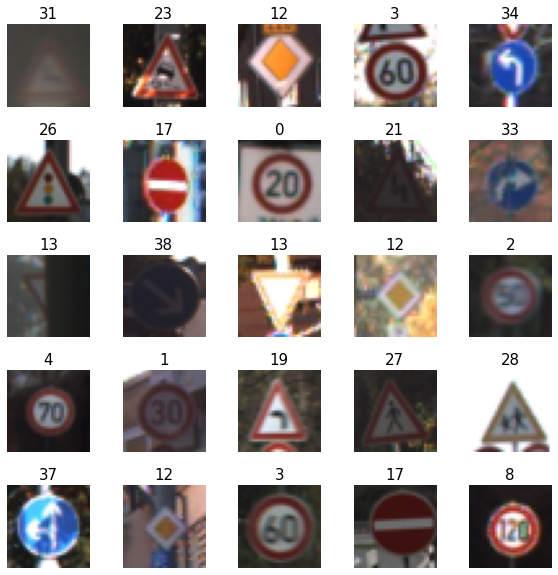

In [31]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid =5
L_grid =5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,25):
    # Select a random number
    index=np.random.randint(0,n_training)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

        

In [9]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [10]:
x_train_gray=np.sum(x_train/3,axis=3,keepdims=True)
x_test_gray=np.sum(x_test/3,axis=3,keepdims=True)
x_valid_gray=np.sum(x_valid/3,axis=3,keepdims=True)

In [11]:
x_train_gray.shape,x_test_gray.shape,x_valid_gray.shape

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1))

In [12]:
x_train_gray_norm=(x_train_gray-128)/128
x_valid_gray_norm=(x_valid_gray-128)/128
x_test_gray_norm=(x_test_gray-128)/128

In [13]:
x_train_gray_norm

array([[[[-0.32552083],
         [-0.13802083],
         [-0.30208333],
         ...,
         [-0.66927083],
         [-0.66145833],
         [-0.70052083]],

        [[-0.18229167],
         [-0.109375  ],
         [-0.29947917],
         ...,
         [-0.66666667],
         [-0.65885417],
         [-0.69791667]],

        [[-0.1875    ],
         [-0.234375  ],
         [-0.359375  ],
         ...,
         [-0.66927083],
         [-0.65364583],
         [-0.69270833]],

        ...,

        [[-0.41666667],
         [-0.3828125 ],
         [-0.30208333],
         ...,
         [-0.65885417],
         [-0.64322917],
         [-0.62760417]],

        [[-0.29427083],
         [-0.30729167],
         [-0.26041667],
         ...,
         [-0.65104167],
         [-0.63541667],
         [-0.609375  ]],

        [[-0.42447917],
         [-0.41666667],
         [-0.3828125 ],
         ...,
         [-0.63541667],
         [-0.625     ],
         [-0.61979167]]],


       [[[-0.55729167],


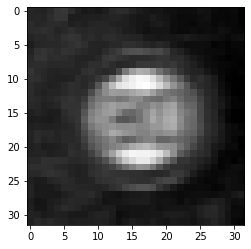

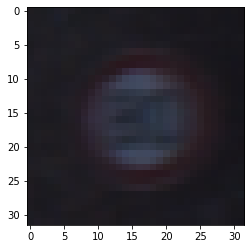

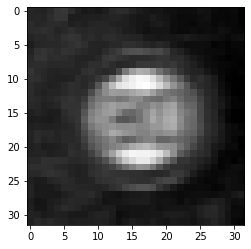

In [14]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

In [15]:
from tensorflow.keras import datasets
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(16,(5,5),activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(43,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
history=model.fit(x_train_gray_norm,y_train,batch_size=500,epochs=50,verbose=1,validation_data=(x_valid_gray_norm,y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 26s 734us/sample - loss: 3.1831 - accuracy: 0.1670 - val_loss: 2.8014 - val_accuracy: 0.2671
Epoch 2/50
34799/34799 [==============================] - 26s 733us/sample - loss: 1.8471 - accuracy: 0.4852 - val_loss: 1.5096 - val_accuracy: 0.5673
Epoch 3/50
34799/34799 [==============================] - 26s 742us/sample - loss: 1.0330 - accuracy: 0.6994 - val_loss: 0.9723 - val_accuracy: 0.7488
Epoch 4/50
34799/34799 [==============================] - 25s 723us/sample - loss: 0.7148 - accuracy: 0.7956 - val_loss: 0.7523 - val_accuracy: 0.8032
Epoch 5/50
34799/34799 [==============================] - 25s 725us/sample - loss: 0.5538 - accuracy: 0.8439 - val_loss: 0.6482 - val_accuracy: 0.8308
Epoch 6/50
34799/34799 [==============================] - 25s 728us/sample - loss: 0.4608 - accuracy: 0.8681 - val_loss: 0.5561 - val_accuracy: 0.8519
Epoch 7/50
34799/34799 [=====================

In [22]:
score = model.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 6s 443us/sample - loss: 0.6476 - accuracy: 0.9061
Test Accuracy: 0.9060965776443481


In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

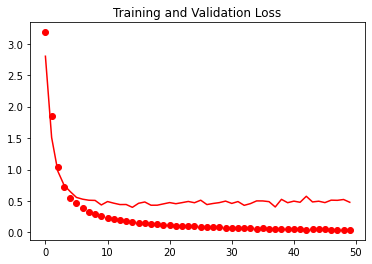

In [25]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title("Training and Validation Loss")

Text(0.5, 1.0, 'Training and Validation Accuracy')

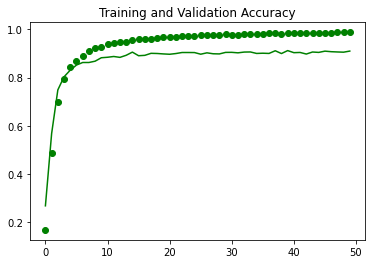

In [28]:
plt.plot(epochs,accuracy,'go',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'g',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")

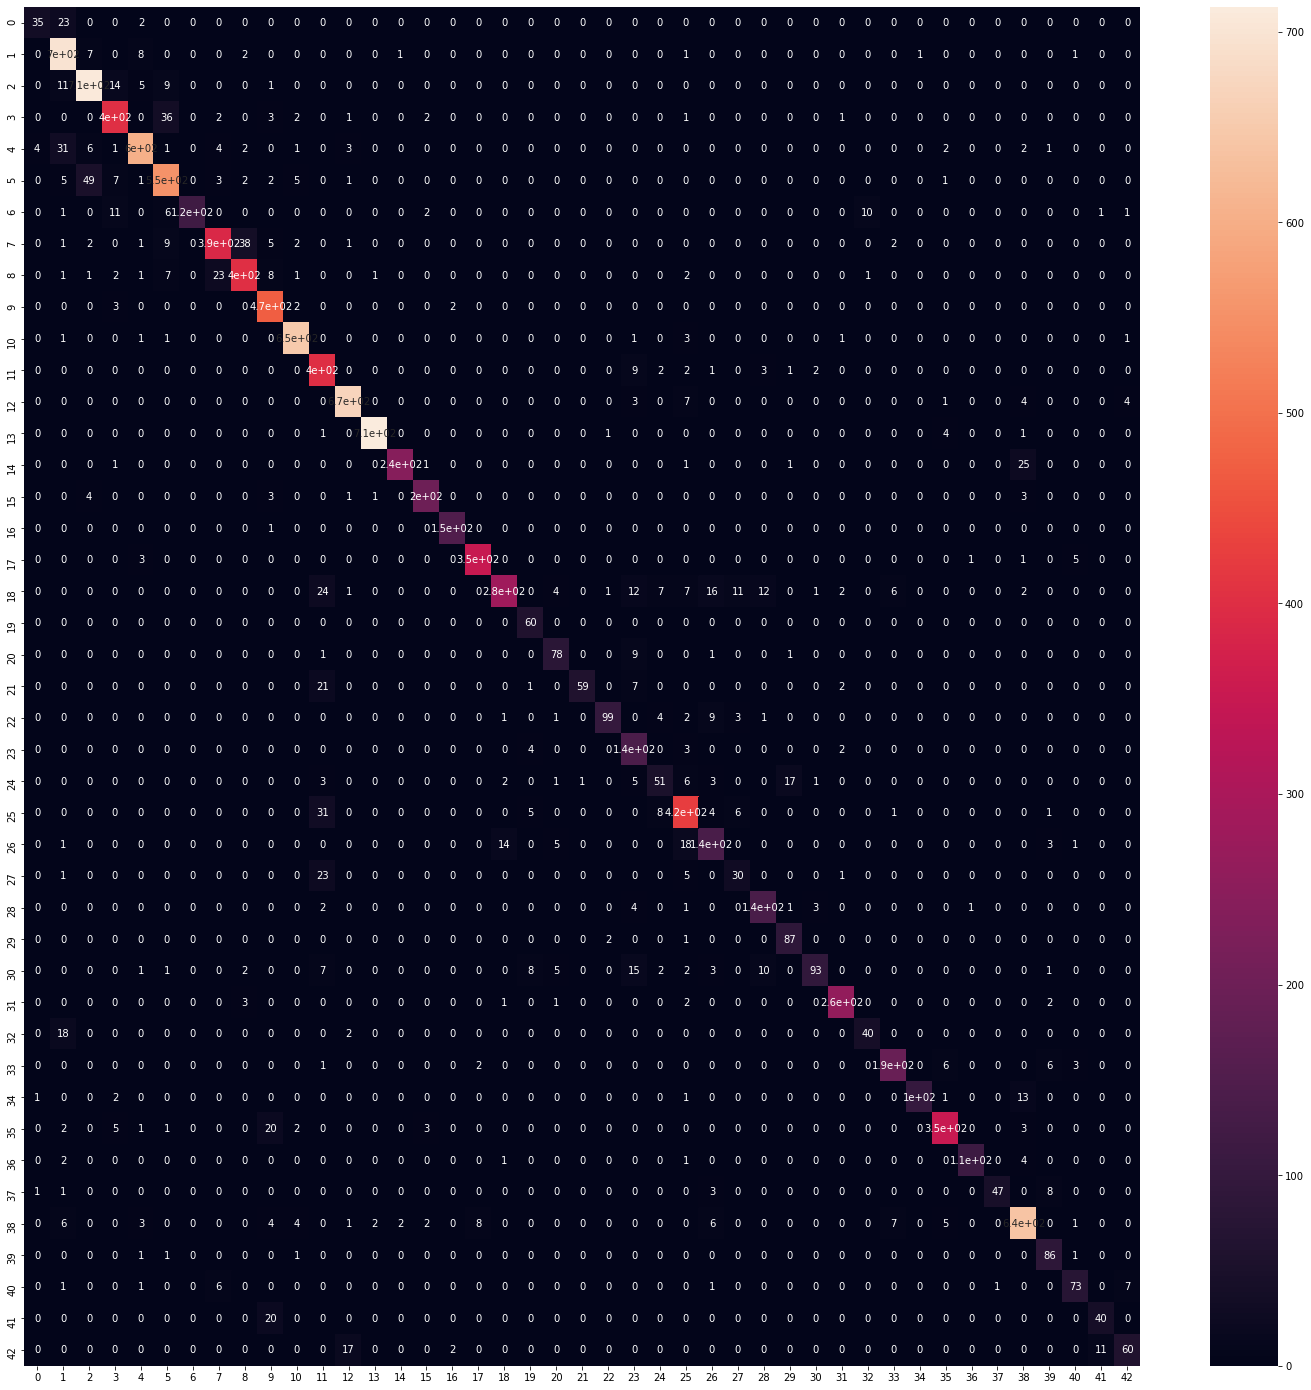

In [29]:
#Confusion Matrix
predicted_classes = model.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

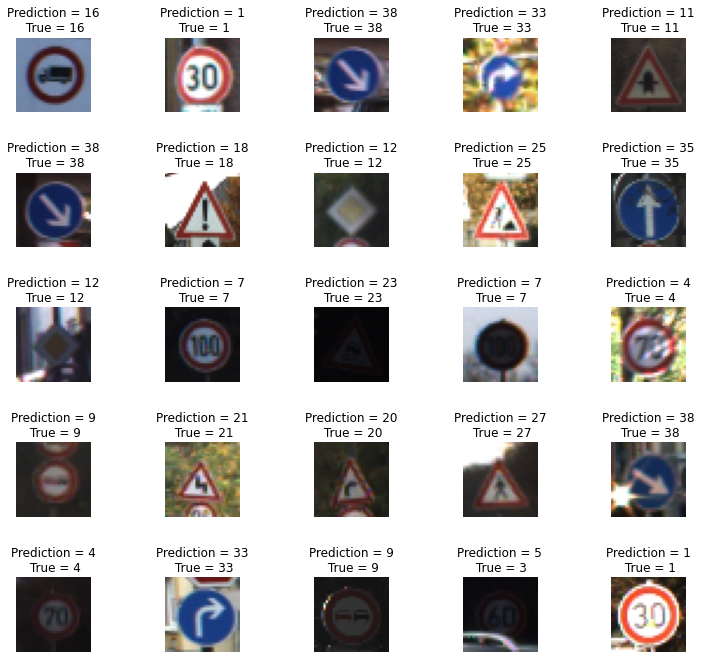

In [30]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }